── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17
Regular,TRUE,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0,Luna,Female,19
Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,17


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<fct>,<lgl>,<chr>,<dbl>,<chr>,<fct>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,17
Veteran,TRUE,7a4686586d290c67179275c7c3dfb4ea02f4d317d9ee0e2cee98baa27877a875,1.6,Lane,Female,23
Beginner,TRUE,4bed6f49b672974f706aa7f020b4f29020326bf594520593557cd381a51559b8,1.5,Sarah,Female,25
Amateur,TRUE,3caa832978e0596779f4ee7c686c4592fb6de893925025d25bf26be9a8cd03f5,0.2,Thatcher,Male,22
Amateur,TRUE,a175d4741dc84e6baf77901f6e8e0a06f54809a34e6b5211159bced346f7fb3e,48.4,Xander,Female,17


played_hours,Age,experience
<dbl>,<dbl>,<fct>
30.3,9,Pro
3.8,17,Veteran
0.7,21,Amateur
0.1,21,Regular
0.1,17,Amateur
1.6,23,Veteran
1.5,25,Beginner
0.2,22,Amateur
48.4,17,Amateur


mean_played_hours,mean_age
<dbl>,<dbl>
10.50917,20.56881


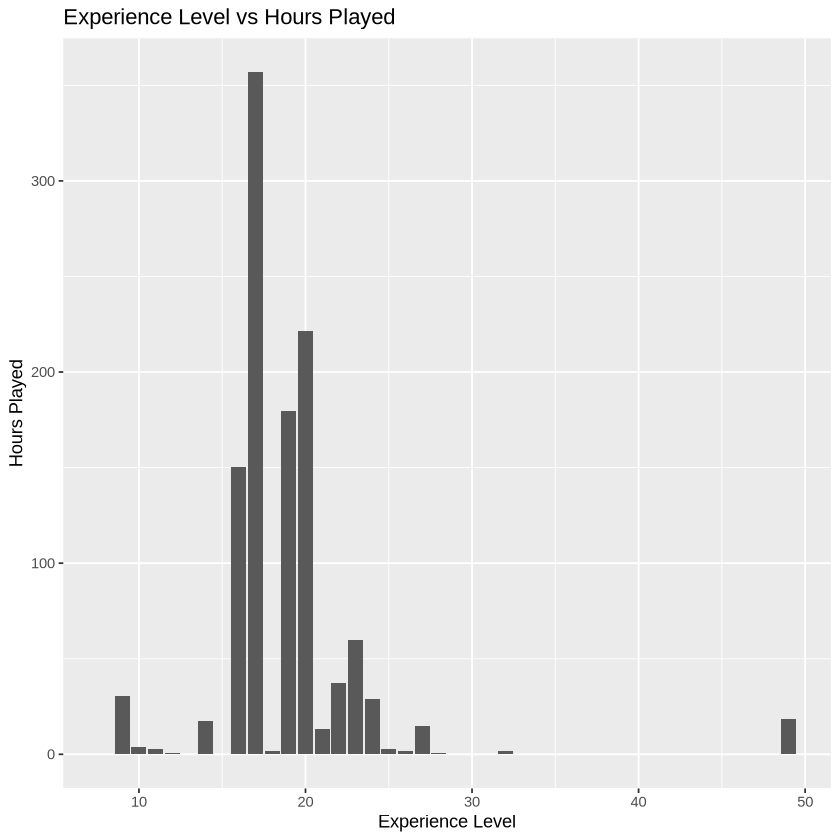

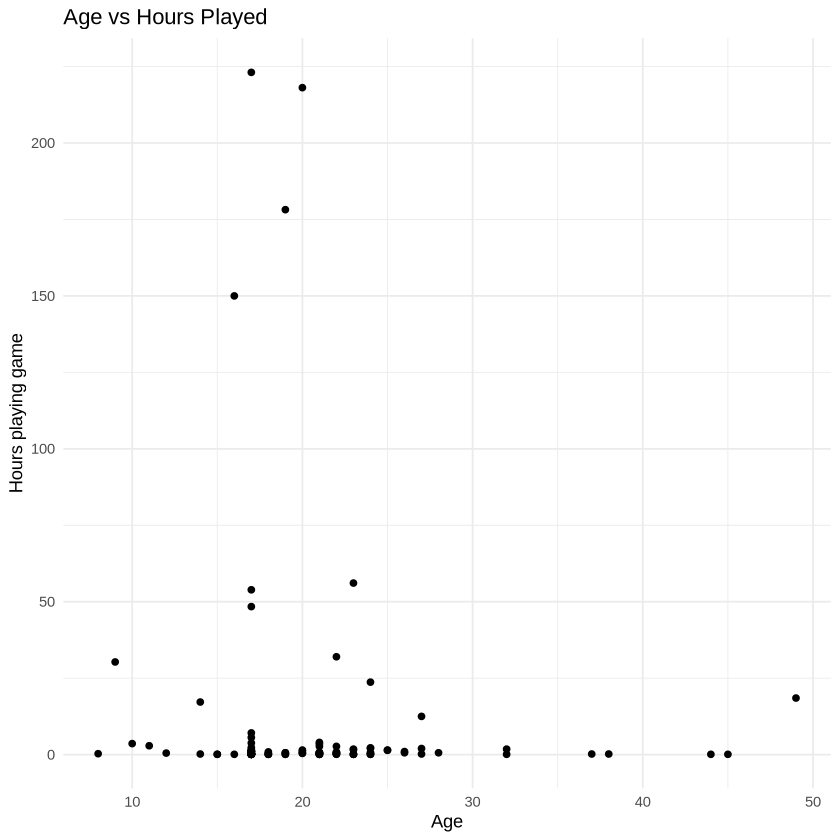

In [1]:
#Loading the data 
library(tidyverse)
url <- "https://raw.githubusercontent.com/lindsayder33/individual_planning_stage/refs/heads/main/players.csv"
players_data <- read_csv(url)
players_data

#Wrangling and cleaning the data 
library(dplyr)
players_tidy <- players_data |> 
  mutate(played_hours = as.numeric(played_hours)) |>
  filter(played_hours != 0.0)

players_tidy <- players_tidy |>
  mutate(
    played_hours = as.numeric(played_hours),  
    Age = as.numeric(Age),                 
    gender = as.factor(gender),              
    experience = as.factor(experience),       
    subscribe = as.logical(subscribe)        
  ) |>
  drop_na() 
players_tidy

#Summary of data set for analysis 
summary <- players_tidy |> 
select(played_hours, Age, experience)
summary
#Mean values of selected numerical variables 
mean_values <- players_tidy |>
  summarise(mean_played_hours=mean(played_hours), mean_age=mean(Age))
mean_values

#Visualizations for exploratory data analysis 
library(ggplot2) 
hours_experience_plot <- ggplot(players_tidy, aes(x=Age, y=played_hours)) + 
                                geom_bar(stat="identity")+
                                xlab("Experience Level") +
                                ylab("Hours Played")+
                             ggtitle("Experience Level vs Hours Played")
hours_experience_plot 

hours_age_plot <- ggplot(players_tidy, aes(x = Age, y=played_hours)) +
  geom_point()+
 xlab("Age")+
ylab("Hours playing game") + 
ggtitle("Age vs Hours Played") +
  theme_minimal()
hours_age_plot
